The objective was to forecast the price of a specific apartment based on market pricing while accounting for various "features" that would be established in the following sections.
Real estate investing appears to be a tempting option for investors.
The major focus of this project is on predicting home prices using genuine factors.

In [ ]:
DATA DEFINITION

1.area_type ---
2.size --
3.bathroom --
4.parking ---
5.ballcony----
6.total_sqft----
7.hospital_nearby---
8.school_nearby----
9.mall_nearby----
10.resale----

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

In [5]:
# read the data
df = pd.read_csv("Bengaluru_House_Dataa (1).csv")

EDA

In [6]:
#checking 1st 5 rows of the dataset
df.head()

,area_type,size,bathroom,parking,balcony,price,total_sqft,hospital_nearby,school_nearby,mall_nearby,resale,location
0,Super built-up Area,2 BHK,2.0,2,1.0,3907000,1056.0,No,No,Yes,0,Electronic City Phase II
1,Plot Area,4 BHK,5.0,1,3.0,12000000,2600.0,No,Yes,Yes,1,Chikka Tirupathi
2,Built-up Area,3 BHK,2.0,1,3.0,6200000,1440.0,No,Yes,Yes,1,Uttarahalli
3,Super built-up Area,3 BHK,3.0,2,1.0,9500000,1521.0,Yes,Yes,No,0,Lingadheeranahalli
4,Super built-up Area,2 BHK,2.0,1,1.0,5100000,1200.0,No,No,Yes,1,Kothanur


In [7]:
#checking last 5 rows of dataset
df.tail()

,area_type,size,bathroom,parking,balcony,price,total_sqft,hospital_nearby,school_nearby,mall_nearby,resale,location
13301,Built-up Area,5 BHK,4.0,1,0.0,23100000,3453.0,Yes,No,Yes,0,Kothanur
13302,Super built-up Area,4 BHK,5.0,1,NaN,40000000,3600.0,Yes,No,Yes,1,Annaiah Reddy Layout
13303,Built-up Area,2 BHK,2.0,2,1.0,6000000,1141.0,No,No,Yes,1,Vidyaranyapura
13304,Super built-up Area,4 BHK,4.0,1,1.0,48800000,4689.0,No,Yes,No,1,Raja Rajeshwari Nagar
13305,Super built-up Area,1 BHK,1.0,1,1.0,1700000,550.0,No,Yes,Yes,1,Hulimavu


In [8]:
#checking shape of dataset
df.shape

(13306, 12)

here are total of 13306 rows and 12 columns in dataset

In [9]:
#checking information of dataset
#tells us about how many rows are present which value and how many are null
# also tells about the datatypes of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13306 entries, 0 to 13305
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area_type        13306 non-null  object 
 1   size             13306 non-null  object 
 2   bathroom         13244 non-null  float64
 3   parking          13306 non-null  int64  
 4   balcony          12715 non-null  float64
 5   price            13306 non-null  int64  
 6   total_sqft       13306 non-null  float64
 7   hospital_nearby  13306 non-null  object 
 8   school_nearby    13306 non-null  object 
 9   mall_nearby      13306 non-null  object 
 10  resale           13306 non-null  int64  
 11  location         13305 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1.2+ MB


In [10]:
#describing the data 
# can check total rows,standard deviation,quartiles,min and max 
df.describe()

,bathroom,parking,balcony,price,total_sqft,resale
count,13244.000000,13306.000000,12715.000000,1.330600e+04,13306.000000,13306.000000
mean,2.661054,1.492635,1.583956,1.113459e+07,1527.415335,0.500225
std,1.216547,0.505942,0.818571,1.420972e+07,839.821773,0.500019
min,1.000000,0.000000,0.000000,9.000000e+05,400.000000,0.000000
25%,2.000000,1.000000,1.000000,5.000000e+06,1100.000000,0.000000
50%,2.000000,1.000000,2.000000,7.200000e+06,1275.000000,1.000000
75%,3.000000,2.000000,2.000000,1.200000e+07,1680.000000,1.000000
max,27.000000,2.000000,4.000000,3.600000e+08,9600.000000,1.000000


In [11]:
# get the summary output for categorical variable
df.describe(include = "object")

,area_type,size,hospital_nearby,school_nearby,mall_nearby,location
count,13306,13306,13306,13306,13306,13305
unique,4,12,2,2,2,1305
top,Super built-up Area,2 BHK,Yes,Yes,No,Whitefield
freq,8790,5525,6739,6660,6709,539


In [12]:
#all the columns present in data
df.columns

Index(['area_type', 'size', 'bathroom', 'parking', 'balcony', 'price',
       'total_sqft', 'hospital_nearby', 'school_nearby', 'mall_nearby',
       'resale', 'location'],
      dtype='object')

In [13]:
#data types of the dataset
df.dtypes

area_type           object
size                object
bathroom           float64
parking              int64
balcony            float64
price                int64
total_sqft         float64
hospital_nearby     object
school_nearby       object
mall_nearby         object
resale               int64
location            object
dtype: object

In [14]:
#checking null values
df.isna().sum()

area_type            0
size                 0
bathroom            62
parking              0
balcony            591
price                0
total_sqft           0
hospital_nearby      0
school_nearby        0
mall_nearby          0
resale               0
location             1
dtype: int64

There are 591 missing values in balcony and  62 in bathroom

Plotting a heatmap of the missing values

Handling Null Values

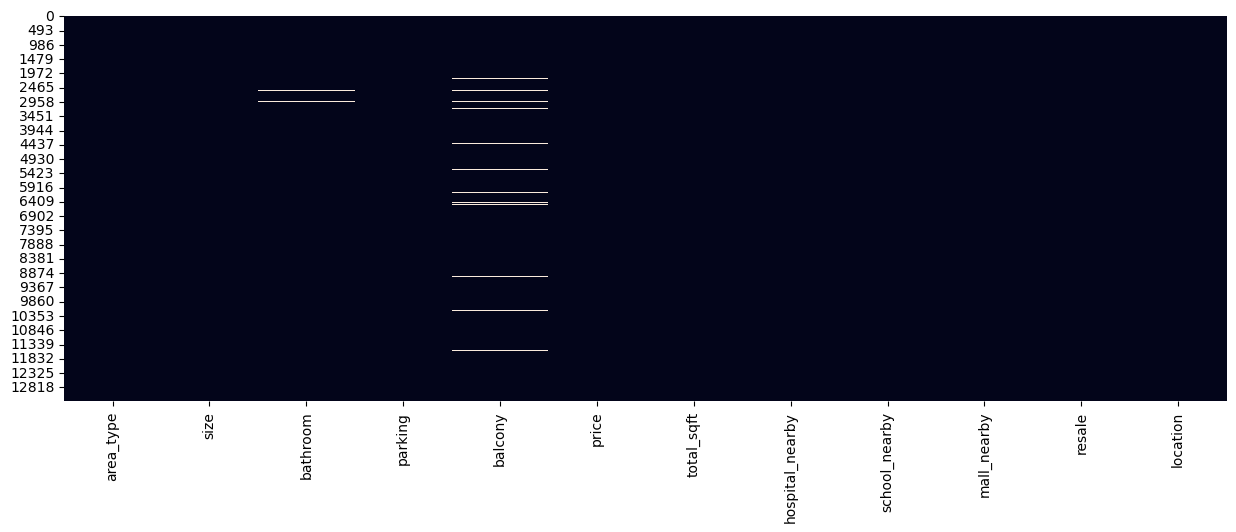

In [15]:
# let us plot a heatmap of the missing values

# import the required libraries
# import the library seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# set the figure size
plt.rcParams["figure.figsize"]=[15,5]

# plot a heatmap of the missing values in the data
# cbar: specify whether to display the color index or not
sns.heatmap(df.isnull(), cbar = False)

# display the plot
plt.show()

In [16]:
# get the count of missing values
missing_values = df.isnull().sum()

# check for missing values
total = df.isnull().sum().sort_values(ascending=False)

# calculate percentage of the missing values
percent = ((df.isnull().sum()/df.shape[0])*100)

# sort the values in descending order
# ascending: 
percent = percent.sort_values(ascending=False)

# concatenate the total missing values and percentage of the missing values
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# add the data types
missing_data['Type'] = df[missing_data.index].dtypes

# view the missing data
missing_data

,Total,Percent,Type
balcony,591,4.441605,float64
bathroom,62,0.465955,float64
location,1,0.007515,object
area_type,0,0.000000,object
size,0,0.000000,object
parking,0,0.000000,int64
price,0,0.000000,int64
total_sqft,0,0.000000,float64
hospital_nearby,0,0.000000,object
school_nearby,0,0.000000,object


In [17]:
from sklearn.impute import KNNImputer

In [18]:
imputer = KNNImputer(n_neighbors=3)

In [19]:
df[['balcony']] = imputer.fit_transform(df[['balcony']])
df[['bathroom']] = imputer.fit_transform(df[['bathroom']])

In [20]:
df.isnull().sum()

area_type          0
size               0
bathroom           0
parking            0
balcony            0
price              0
total_sqft         0
hospital_nearby    0
school_nearby      0
mall_nearby        0
resale             0
location           1
dtype: int64

In [21]:
# drop the rows having missing values
df1 = df.dropna()

# display the dataframe
df1.shape

(13305, 12)

In [22]:
df1.isnull().sum()

area_type          0
size               0
bathroom           0
parking            0
balcony            0
price              0
total_sqft         0
hospital_nearby    0
school_nearby      0
mall_nearby        0
resale             0
location           0
dtype: int64

In [23]:
df1

,area_type,size,bathroom,parking,balcony,price,total_sqft,hospital_nearby,school_nearby,mall_nearby,resale,location
0,Super built-up Area,2 BHK,2.0,2,1.000000,3907000,1056.0,No,No,Yes,0,Electronic City Phase II
1,Plot Area,4 BHK,5.0,1,3.000000,12000000,2600.0,No,Yes,Yes,1,Chikka Tirupathi
2,Built-up Area,3 BHK,2.0,1,3.000000,6200000,1440.0,No,Yes,Yes,1,Uttarahalli
3,Super built-up Area,3 BHK,3.0,2,1.000000,9500000,1521.0,Yes,Yes,No,0,Lingadheeranahalli
4,Super built-up Area,2 BHK,2.0,1,1.000000,5100000,1200.0,No,No,Yes,1,Kothanur
...,...,...,...,...,...,...,...,...,...,...,...,...
13301,Built-up Area,5 BHK,4.0,1,0.000000,23100000,3453.0,Yes,No,Yes,0,Kothanur
13302,Super built-up Area,4 BHK,5.0,1,1.583956,40000000,3600.0,Yes,No,Yes,1,Annaiah Reddy Layout
13303,Built-up Area,2 BHK,2.0,2,1.000000,6000000,1141.0,No,No,Yes,1,Vidyaranyapura
13304,Super built-up Area,4 BHK,4.0,1,1.000000,48800000,4689.0,No,Yes,No,1,Raja Rajeshwari Nagar


In [24]:
df1.head()

,area_type,size,bathroom,parking,balcony,price,total_sqft,hospital_nearby,school_nearby,mall_nearby,resale,location
0,Super built-up Area,2 BHK,2.0,2,1.0,3907000,1056.0,No,No,Yes,0,Electronic City Phase II
1,Plot Area,4 BHK,5.0,1,3.0,12000000,2600.0,No,Yes,Yes,1,Chikka Tirupathi
2,Built-up Area,3 BHK,2.0,1,3.0,6200000,1440.0,No,Yes,Yes,1,Uttarahalli
3,Super built-up Area,3 BHK,3.0,2,1.0,9500000,1521.0,Yes,Yes,No,0,Lingadheeranahalli
4,Super built-up Area,2 BHK,2.0,1,1.0,5100000,1200.0,No,No,Yes,1,Kothanur


In [26]:
df1['location'] = df1['location'].replace(['Rajaji Nagar','Binny Pete',
'Domlur','Malleshwaram','Jai Bheema Nagar','Langford Town','KUDLU MAIN ROAD','Ulsoor','Indira Nagar','Sulthangunta','Kudlu',
'Kathriguppe','Sadashiva Nagar','Indiranagar HAL 2nd Stage','Hosakerehalli Layout','Vasantha Vallabha Nagar','Williams Town',
'Vasanth nagar','D Souza Layout','Seetharampalya','Poorna Pragna Layout','Kavika Layout','HOSUR MAIN ROAD','Nandi Durga Road',
'Kumara Park','Victoria Layout','Shivaji Nagar','Chennammana Kere','Kathreguppe','Cambridge Layout','1st Stage Indira Nagar',
'Dollars Layout','Cleveland Town','Domlur Layout','Indira Nagar 3rd Stage','Jayamahal Extension','Lavelle Road',
'6th Block Rajaji Nagar','1st Stage Domlur','Lakkasandra','Seshadripuram','Cottonpet','Maruthi Extension','Srinivas Colony',
'Subash Nagar','Langford Gardens','Lakkasandra Extension','Gandhi Nagar','Vittal Mallya Road','High grounds','TR Mill Road, Chamarajpet',
'Rest House Road','Neelasandra','Yediyur','KG Halli','Cubbon Road','Veerabhadra Nagar','Indira Nagar Stage 2','Bilal Nagar',
'Church Street','poornaprajna layout','Kathriguppe IV Phase','Chikku Lakshmaiah Layout','Ashok Nagar','Hoskote near',
'Infantry Road','Anantapuram','Xavier Layout','Chikbasavanapura','Subhash Nagar','Jogupalya','Sindhi Colony','Abshot Layout', 'Ashwath Nagar'], 'Central Region')

In [27]:
df1['location'] = df1['location'].replace(['Whitefield','Old Airport Road','Marathahalli','Bellandur','Ramagondanahalli',
'Bhoganhalli','Lakshminarayana Pura','Varthur','Gunjur','Kodanda Reddy Layout','Garudachar Palya','EPIP Zone','Devasthanagalu',
'Kadugodi','Anandapura','Kannamangala','CV Raman Nagar','Pattandur Agrahara','Panathur','Nagondanahalli','Off Sarjapur Road,', 
'Kullappa Colony','Mukkutam Nagar','Ncpr Industrial Layout','Kundalahalli Colony','Ambedkar Nagar','Old Madras Road',
'Kaggadasapura','Silver Springs Layout','AECS Layout','Munnekollal','Thigalarapalya','Ardendale','Kodihalli','Narayanapura',
'Mahadevpura','Hoodi Circle,', 'Sompura','Dodda Nekkundi','Hoodi','Samethanahalli','Kada Agrahara','Yemlur, Old Airport Road,', 
'K G Colony','Marathalli bridge','Dooravani Nagar','JCR Layout','Hosapalya','Varthur Road','Anjappa Layout','Sadaramangala',
'Green Garden Layout','Jeevan bima nagar','Narayana Nagar 1st Block','Basavanagara','Belathur','Thubarahalli','Kaverappa Layout',
'Devarabisanahalli','NRI Layout','ITPL','Nagappa Reddy Layout','Kariyammana Agrahara','Binnamangala','Basava Nagar',
'Channasandra','Kacharakanahalli','Bidere Agarahara, Behind Safal market','Gopalkrishna Nagar','Sai Gardens','Byappanahalli',
'Pai Layout','ECC Road, Whitefield,', 'Devasandra Extension','Sarjapur Road,', 'Varthur Road,', 'Green Woods Layout',
'Immadihalli','Manjunatha Layout','Abbaiah Reddy Layout','KPC Layout','Rustam Bagh Layout','New Thippasandra','Kumbena Agrahara',
'Pai layout , Mahadevapura','Laggere','Prithvi Layout','Vijinapura','Badavala Nagar','Belatur','Nallurhalli','Chinnapanahalli',
'Laxmi Sagar Layout','Nagavarapalya','Tasker Town','Sir M V Nagar','Yemlur','Doopanahalli','Alfa Garden Layout','Hoodi Layout',
'Someshwara Layout','Channasandra Layout','HAL 3rd Stage','B Channasandra','Arehalli','Cambridge  road',
'Hennur Gardens','Bharathi Nagar','Thanisandra Main Road,', ' Bhoganhalli','Amruthnagar','Bidadi','Dodsworth Layout',
'HAL 2nd Stage',' Devarabeesana Halli','Viswajit Layout','Volagerekallahalli','Hagadur','Jyothi Nagar','Raghuvanahalli',
'Geddalahalli','Kumbhena Agrahara','Challaghatta','KR Garden','Mallathahalli','Laxminarayana Layout','white field,kadugodi',
'Crimson Layout','Maithri Layout','Geetanjali Layout','EPIP AREA, WHITEFIELD','Hadosiddapura','1 Annasandrapalya',
'Kuvempu Nagar','Prasanth Extension','Indranagar  100ft road defence colony','BEML Layout 5th stage','Ramesh Nagar',
'A Narayanapura','Jinkethimmanahalli','Vimanapura','Bidrahalli','whitefiled','N R Layout','Brooke Bond First Cross',
'Chikkakannalli','Thanisandra main road','Doddabanahalli','1Channasandra','Whitefield,', 'Udaya Nagar',' Whitefield',
'Indra Nagar','Puttappa Layout','Bethel Nagar','Bennigana Halli','Bellandur,','Marasandra','Kalkere Channasandra',
'Rainbow Drive','Dasappa Layout','Krishna Reddy Layout','Sathya Layout','Chennappa Layout','Sadanand Nagar','Whietfield,', 
'Kasthuri Nagar East Of NGEF','Amrita Nagar','Tigalarpalya','sarjapura main road','M V Extenstion','Ankappa Layout',
'1 Immadihalli','Krishna Nagar','Uday Nagar','Chaitanya Ananya','Konena Agrahara','Raghavendra Layout','Varsova Layout',
'Bhattarahalli','HAL Layout','Satyasaibaba Layout','Queens Road','Jagadish Nagar','SARJAPUR BAGALUR ROAD',
'Rajasree Layout','Brindavan Layout','Annasandrapalya','Panathur Road,', 'Michael Palaya','Akash Nagar','Postal Colony',
'Ashraya Layout','Whitefield ECC Road','Ayappa Nagar','Hal old airport road','Maheswari Nagar','Versova Layout',
'Halanayakanahalli','Air View Colony','akshaya nagar t c palya','mvj engineering college','Sadhguru Layout','Doddanakunte',
'Masjid e Alkareem','Kundalahalli','Murugeshpalya', ' Thanisandra', 'Hoodi Circle,', 'Yemlur, Old Airport Road, ',
'ECC Road, Whitefield,', 'Varthur Road,', 'Garden Layout', 'Hoodi Circle,', 'Kudlu Village,', 'Thanisandra Main Road, ',
'Yemlur, Old Airport Road, ', 'Kudlu Village,', 'Whitefield, ', 'Whietfield, ', 'Panathur Road, ', 'Whitefield, ', 'ECC Road, Whitefield, ' ], 'East Region')

In [28]:
df1['location'] = df1['location'].replace(['KR Puram','1 Ramamurthy Nagar','Banaswadi','Lingarajapuram','3rd Block HBR Layout',
'Devanahalli','Ramamurthy Nagar','Hormavu','Ramaswamy Palya - Kammanahalli Main Road','Kalyan nagar','Horamavu Agara',
'Balagere','Banjara Layout','Kammanahalli','HBR Layout','Horamavu Banaswadi','Frazer Town','Cooke Town','5th Block Hbr Layout',
'Chikka Banaswadi','Outer Ring Road East','Devanahalli Road','Malimakanapura','frazertown','Subramanyanagar',
'Chokkasandra','Hoskote','Ramamohanapuram','Pulkeshi Nagar','Banaswadi,', 'T c palya','Doddakammanahalli','Ganesha Block',
'Maragondana Halli, kr puram, old madras road','Dodda Banaswadi','Pulikeshi Nagar','Ckikkakammana Halli','Kalhalli',
'Near International Airport','Fraser town','Shettihalli','1st Block HBR Layout','Ramamurthy Nagar Extension',
'T C Palya main Road', 'Haralur Road, ', 'Hoodi Circle, ','PNS Layout',' Banaswadi','Shingapura','2nd Block Hbr Layout','Garebhavipalya','cooketown',
'kamanahalli main road','Viviani Road','Anwar Layout','4th Block HBR Layout','Jeevanhalli','Banasawadi,', 'Amam Enclave Layout',
'Dominic Layout','Wheelers Road','Sarvobhogam Nagar','Banaswadi, ', 'Banasawadi, '], 'North-East Region')

In [29]:
df1['location'] = df1['location'].replace(['Chikka Tirupathi',
'Palace Guttahalli','Bhagyalakshmi Avenue','Vyalikaval','Balaji Gardens Layout',
' Rachenahalli', 'Dr Shivarama Karantha Nagar', 'Adityanagar'], 'North-West Region')

In [30]:
df1['location'] = df1['location'].replace(['Uttarahalli','Lingadheeranahalli','Kothanur','Gandhi Bazar','7th Phase JP Nagar',
'Gottigere','Mysore Road','Mangammanapalya','Kanakpura Road','Chikkalasandra','Doddathoguru','Himagiri Meadows','Begur Road',
'Govindaraja Nagar Ward','Devarachikkanahalli','Double Road','Haralur Road','Kothannur','Kalena Agrahara','ISRO Layout',
'Kasavanhalli',' Mysore Highway','Sarjapura - Attibele Road','Chandapura','Shantiniketan Layout','Lakshmiamma Garden',
'Akshaya Nagar','LB Shastri Nagar','Vajarahalli','Vishwapriya Layout','Kudlu Gate','8th Phase JP Nagar','Basavanapura',
' Devarachikkanahalli','Hulimavu','Yarandahalli','Hosa Road','Kothnur Narayanapura','Attibele','CHIKKATIRUPATHI','Kumaraswami Layout',
'Ejipura','Padmanabhanagar','1st Block Jayanagar','Muthurayya Swamy Layout','Dommasandra','Mylasandra','Bank Of Baroda Colony',
'Shree Ananth Nagar Layout','Talaghattapura','Jigani','9th Phase JP Nagar','Giri Nagar','Singasandra','Mallasandra','Begur',
'JP Nagar','Sunder Ram Shetty Nagar','Malleshpalya','Kodathi','Akshaya Vana','Kaggalipura','Basavanna Nagar','6th Phase JP Nagar',
'Somasundara Palya','Bull Temple Road','Suragajakkanahalli','Harlur','Banashankari3rd stage bigbazar','Bannerghatta Road',
'5th Phase JP Nagar','Billekahalli','Anekal','Hosur Road','Ambalipura','Brookefield','Suddaguntepalya','Udayapur Village',
'Vittasandra','1 Giri Nagar','NS Palya','Subramanyapura','Basavangudi','Omkar Nagar','Maragondanahalli','Silk Board',
'Kambipura','Banashankari Stage III','Ittamadu','Rajiv Nagar','Gattahalli','Arekere','Ramanjaneyanagar','Mico Layout','7th Block Jayanagar',
'2nd Phase JP Nagar','Banashankari','Ashwini layout','Kanakapura','Venkatapura','Sneha Colony','Konanakunte','Doddagubbi',
'Margondanahalli','ITI Layout','Vasanthapura','6th block banashankari 3rd stage, 100 feet ORR','Poornapragna Housing Society Layout',
'Hosakerehalli','Huskur','Shanthala Nagar','Srinivasa Nagar','Byrathi Village','Kodichikkanahalli','Anjanapura','B Narayanapura',
'Gubbalala','Dairy Circle','Parappana Agrahara','KSRTC Layout','V.V Puram','Banashankari Stage VI','Kalasipalya','Yelachenahalli',
'Hennagara','Green Glen Layout','BAGUR','Naganathapura','1st Phase JP Nagar','NGR Layout','sapthagiri Layout','Seegehalli',
'Thurahalli','Weavers Colony','KR Layout''Suraksha Nagar','Lakshmi Layout''Ananth Nagar','Basapura','Singena Agrahara',
'Mango Garden Layout','Choodasandra','Hanumanth Nagar','Kaikondrahalli','Neeladri Nagar','Jaya Nagar East','Iggalur',
'Doddakallasandra','Chamrajpet','VGP Layout','Classic Paradise Layout','Rayasandra','Kalkere','Siddapura','Roopena Agrahara',
'Banashankari Stage V','Sonnenahalli','Rukmaiah Layout','2nd Phase Judicial Layout','Byadarahalli','Vinayaka Nagar',
'Banashankari Stage II','GB Palya','9th Block Jayanagar','Karuna Nagar','Gaurava Nagar','AGS Layout','Srinagar','Bannerghatta',
'Maruthi HBCS Layout','Craig Park Layout','Banagiri Nagar','Bharath Housing Society Layout','3rd Block Jayanagar','Konanakunte Cross',
'Tavarekere','Daadys Gaarden Layout','Marsur','Garden Layout''Akshayanagara East','Doddanekundi','Venkatadri Layout','Bommenahalli',
'Vittal Nagar','3rd Block Banashankari','Kadarenahalli','5th Stage BEML Layout','Jaya Mahal layout','Lalbagh Road','Vignana Nagar',
'Hongasandra','Harappanahalli','NR Colony','Agara Village','Shettigere','Byagadadhenahalli','Remco Bhel Layout','Panduranga Nagar',
'Bikasipura','kanakapura road','Sundar Ram Shetty Nagar','Gowdanapalya','Gaundanapalya','Sunkadakatte','Vishwapriya Nagar',
'Sarakki Nagar','Thyagaraja Nagar',' ittamadu','Doddakannelli','Jayanagar','banashankari stage iii sa',' Anekal','Friends Colony',
'Thavarekere','Keerthi Layout','Shikaripalya','Reliable Woods Layout','4th T block Jayanagar','Popular Colony','Banashankari 6th Stage ,Subramanyapura',
'Virat Nagar','Chennammanakere Achukattu','Jp nagar 8th Phase .','Nobo Nagar','Kanakapura Road','J P Nagar 7th Phase Ramayya City',
'Bellari Road','1Hanuman Nagar','Wilson Garden','Nyanappana Halli','Sahyadri Layout','Bagalur','Vinayak Nagar','P Krishnappa Layout',
'Hanumantha Nagar','MLA Layout','Nagadevanahalli','Celebrity Paradise Layout','Banashankari 2nd Stage','Marenahalli',
'JP Nagar 8th Phase,', 'Kachanayakanahalli','Nagaraja Garden','JP nagar 9th Phase,', '4th Block Jayanagar','Canara Bank Colony',
'Hanumagiri','Akshayanagara West','Chikkathoguru','Junnasandra','Sarvabhouma Nagar','Banashankari stage 2','Chikkadunnasandra',
'Gattigere','Sampangi Rama Nagar','Pragathi Nagar','1st Stage Radha Krishna Layout','Vasantapura main road','Venugopal Reddy Layout',
'Lake City','Meenakshi Layout','S R Layout','JP Nagar 7th Phase,', 'Sadduguntepalya','Glass Factory Layout','Basnashankari,6th stage,',
'Saptagiri Layout','Kempegowda Nagar','4th Phase JP Nagar','K R C kothanur','2nd Block Jayanagar','Ilyas Nagar','3rd Phase JP Nagar',
'kanakapura main road','Reliaable Tranquil Layout','Mailasandra','8th Block Jayanagar','Lal Bahadur Shastri Nagar',
'Omarbagh Layout','Aishwarya Crystal Layout','DUO Layout','Carmelaram',' south','Jakkasandra Extension','Arekempanahalli',
'Hullahalli','Chickpet','T G extension','rr nagar','J.P.nagar 6th Phase.Sarakki Nagar','Doddabele','Shanti Nagar',
'2nd Stage Arekere Mico Layout','Veer Sandra','Kothnoor Dinne','Vasanthpura','Chikka Gowdanapalya.','Nirman Layout','Vikram Nagar',
'RR Layout','Billapura','Janatha Colony','Anekal - Hosur Road','2nd phase jp nagar, jp nagar','BEML Layout 5th Stage',
'Narayanappa Garden','Upadhyaya Layout','bsk 6th stage 2ad block near sri conversation hall',
'Annapoorneshwari Layout, JP nagar 7th phase','elachenahalli','Vivek Nagar',' Basavangudi','Banashankari 6th stage , 2nd block',
'Vidhyanagar Cross','6th Block Jayanagar','T R Mill Road','Hommadevanahalli','Navodaya Nagar''Kanakapura Main Road',
'Suryanagar','Duvasapalya','BCMC Layout','Byrasandra Extension','Sugama Layout','Anugrah Layout','Bandepalya','Bettadasanapura',
'Gulimangala','Addischetan Layout','Bande Nallasandra','Vidya Nagar','SHANTHINAGAR','Jay an agar 4 T Block','Koppa','RR Nagar',
'3rd Phase Iti Layout','Phase 1 Kammasandra','Deepanjali Nagar','Konappana Agrahara','Thirumalashettyhally','5th Block Jayanagar',
'Jayanagar,', 'Neelamangala','Banashankari 6th Stage','PC Palaya','Soppahalli','Jayanti Nagar','Ramanashree Enclave',
'Banashankari 2 nd Stage','Rajapura','Thirupalya','Off Bannergatta road','Haralur Road,', 'RK Colony','Vasatha Vallbha Nagar',
'BAGUR ROAD','Shanthi Pura','Sampangirama Nagar','Doctor Layout Rayasandra','AECS LAYOUT A-BLOCK Singasandra','Banashankari Stage I',
'RBI Layout','Shauhardha Layout','Harohalli','Anathanagar','vinayakanagar','Jaraganahalli Jp Nagar Post','adigondanhalli',
'Off Bannergatta Road','Kanakapura  Rod','Prasanti Nagar','Old Mangammanapalya Road','1Kasavanhalli','Kanakapura Road,', 
'Ramanagara Channapatna','Thyagraj Nagar','Banagirinagar','Udayagiri','Chikkanahalli','Banashankari 3rd stage, Vivekanandanagar',
'LIC Colony','Chuchangatta Colony','Hanuman Nagar','Gulakamale','Zuzuvadi','Kanakapura main  Road','Kanakapur Main road',
'Tilak Nagar','12th cross srinivas nagar banshankari 3rd stage','Off Sarjapur Road, KR Layout', 'Lakshmi Layout',
'Sarjapur Road,', 'Off Sarjapur road,', 'JP Nagar 8th Phase,', 'JP nagar 9th Phase,','KR Layout', ' Electronic City',
'Electronic city Phase 1,', 'JP nagar 9th Phase,','HSR Layout 7th sector,','Jayanagar,', 'Near Electronic City,', 'Electronic City Phase 1, ',
       'Electronic city Phase 1, ', 'Sarjapur Road, ',
       'Electronic city phase 1, ',
       'Judicial Layout, Kanakapura Road, ',
       'Kanakapur main road', 'Kanakapura Main Road',
       'Kanakapura Road, ', 'Kudlu Village, ',
       'Near Electronic City, ', 'Suraksha Nagar',
       'Varthur Road, ',
       'Off Sarjapur Road, ', 'Off Sarjapur road, ',
' Sector 1 HSR Layout','Kanakapura Road,'], 'South Region')

In [31]:
df1['location'] = df1['location'].replace(['Bisuvanahalli''Ramakrishnappa Layout','Manayata Tech Park','Thanisandra', 'Thanisandra',
'Yelahanka','Hebbal','Kasturi Nagar','Ganga Nagar','Adarsh Nagar','Tharabanahalli','Hegde Nagar','Hennur Road',
'Cholanayakanahalli','Kaval Byrasandra','Dasanapura','Sanjay nagar','T Dasarahalli','Yeshwanthpur','Peenya','Jalahalli West',
'Byatarayanapura','Shampura','Dinnur','Sanjeevini Nagar','Keshava Nagar','RMV Extension','Tejaswini Nagar','Nagavara',
'Hebbal Kempapura','Jakkuru Layout','MS Pallya','Nagasandra','Kogilu','Kammasandra','Tala Cauvery Layout','Dasarahalli',
'Magadi Road','Budigere','Dodda Nekkundi Extension','Dr Shivarama Karantha Nagar''Ashwath Nagar','Meenakunte','OMBR Layout',
'Anand Nagar','MCECHS  layout','Coffee Board Layout','Geleyara Balaga Layout','Sundara Nagar','Srirampura','Jakkur','TC Palaya',
'Maruthi Sevanagar','RMV 2nd Stage','Motappa Layout','T.C PALYA','Muneshwara Nagar','Prashanth Nagar','Sampigehalli','RMV',
'Bagalur Main Road','Hennur','Kodigehaali','Gopalapura','Jalahalli','Ashirvad Colony','K N Extension','Battarahalli',
'Gokula Extension','Sultan Palaya','Sanne Amanikere','Amco Colony','Yelenahalli','Richmond Town','Thippasandra','Chikkabidarakallu',
'Hoysalanagar','Defence Colony','Vidyaranyapura','Amruthahalli','Kodigehalli','Patelappa Layout','Kenchenahalli','3rd Block Hrbr Layout',
'Bank Avenue','Surabhi Layout','Kereguddadahalli','BHEL Layout','Medahalli','Kashi Nagar','Chikkabanavar','HRBR Layout','Nehru Nagar',
'R.T. Nagar','Tumkur Road','Hosahalli','GM Palaya','near Ramanashree California resort''Jalahalli East','Bettahalsoor',
'Ambedkar Colony','Avalahalli','Prakruthi Nagar','Abbigere','Tindlu','P&T Colony','Cunningham Road','Chelekare','Palanahalli',
'Vadarpalya','HMT Layout','Cox Town','4 BHK Farm House in Bagalur','Yelahanka New Town','Sahakara Nagar','manyata park',
'Rachenahalli','Vishwanatha Nagenahalli','Singapura Village','Ferrar Nagar','M.G Road','Divya Unnathi Layout','Alur',
'Dwarka Nagar','Hallehalli','Kattigenahalli','Raghavendra Nagar','Babusapalaya','Kempapura','Hessarghatta','Kadugondanahalli',
'2nd Block Hrbr Layout','Canara Bank Layout','Dodda Kempaiah Layout','Hunasamaranahalli','RWF West Colony','Bileshivale',
'Chokkanahalli','Chikkaballapur','T.C. Palya','Makali','Vibuthipura','Defence Layout','Coconut Garden','Devanahalli Int. Airport',
'Puttanahalli','Benson Town','1st Block HRBR Layout','Judicial Layout','Hennur Busstop','AMS Layout','Ashwathnagar','Brigade Road',
'Hiremath Layout','Chikkasandra','Thirumenahalli','Maruthi Nagar','Kallumantapa','T K Reddy Layout','Bhuvaneshwari Nagar',
'P&T Layout','Byrasandra','SBM Colony','Veerannapalya','Chowdeshwari Layout','Mathikere Extension','Anantapura','Govindpura',
'BEL Road','Maruthi Layout','Sri Venkateshpura Layout','Jakkur Plantation','Srirampuram','Race Course Road','Gkvk Layout',
"St. John's Road",'Sathanur','Kaveri Nagar','JakkurYelahanka','Gunjur Palya','Doctors Layout','Austin Town','Rajagopala Nagar',
'Bahubali Nagar','Lottegolla Halli','Vibhutipura Extension','Dollars Colony','Howthinarayanappa Garden','Mathikere',
'Sri Balaji Krupa Layout','Virgonagar''Adityanagar','BDS Layout','Shanthi Layout','Esther Enclave Layout','Ganga Nagar Extension',
'Huttanahalli','Amarjyothi Colony','Chikkabettahalli','Bhuvaneswari Nagar','Varanasi','Gopal Reddy Layout','sankeswari',
'Dhanalakshmi Layout','Green Domain Layout','Nanjappa Layout','Sri Kanteshwara Nagar','Tata Nagar','RK Layout 2nd Stage',
'Tirumanahalli','Brindavan Nagar','Mariyannapalya','Palace Road','Narayanappa Layout','Kanakadasa Layout','Mathikere SBM colony',
'Bagalakunte','Goraguntepalya','Rajankunte','Kyalasanahalli','St Thomas Town','Kumarapalli','Nagawara Junction','Nanjappa Garden',
'Vayunandana Layout','Kenchenhalli','RMV extension stage 2, rmv extension','Anand nagar','Handenahalli','manyata tech park',
'CQAL LAYOUT C BLOCK','Doddanakundi Industrial Area 2','OLd Gurappanapalya','Wajid layout thanisandra','Achins Road',
'singapura paradise','Kannur','Amblipura','CQAL Layout','Old Town','Vidyapeeta','GD Layout','Shirdi Sai Nagar','J C Nagar',
'Medi Agrahara','Subbannaiah Palya','Richards Town','Manorayana Palya','Madanayakahalli','Jaladarsini Layout','Attur Layout',
'Near ullas theater','Yeshwanthpur Industrial Suburb','Nandi Hills','Vaderahalli','Singanayakanahalli','Vaishnavi Layout',
'Thomas Town','Manganahalli','t.c palya','Basvasamithi Layout Vidyaranyapura','Atmananda Colony','Baba Nagar','Badrappa Layout',
'Kirloskar Layout','tc.palya','Dollar Scheme Colony','anjananager magdi road','Kodipalya','Gokaula Extension','Hennur Bande',
'ravindra nagar, T.dasarahalli peenya','1st Block BEL Layout','Prakruthi Township','Seethappa Layout','Shakthi Nagar',
'Malur Hosur Road','Lakshmipura Vidyaanyapura','Rajanna Layout','Rahat Bagh','Escorts Colony','asha township, off hennur road',
'NTI Layout','Sonam Layout','Chamundi Nagar','Gangondanahalli','Kuvempu Layout','GKW Layout','Venkateshpuram','Judicial Layout, Kanakapura Road', 
'Sadahalli','Jayamahal','RMV Extension Stage 2','Dena Bank Colony','Chokkahalli','Telecom Layout','Virupakshapura',
'Muthyala Nagar','Coconut Grove Layout','2nd Block Bel Layout','Manonarayanapalya','Kamdhenu Nagar','Ganganahalli',
'Ex-Servicemen Colony Dinnur Main Road R.T.Nagar','CMH Road','B K Nagar','Punappa Layout','Pampa Extension','Jaymahal Road',
'Agrahara Dasarahalli','Guni Agrahara','Shankarapuram','Shetty Halli','AGB Layout','Nagashetty Halli','Sri Sai Layout',
'Devara Jeevanahalli','SK Garden','Naidu Layout','Behind Don Bosco Church','Somanna Garden','Ananthapura, T C palaya Main Road',
'KEB Colony','Vinayaka Layout','Bharathnagar','Millers Road','Madavara','Dwaraka Nagar','Chambenahalli','Ramchandrapuram',
'1Hoysalanagar','Aavalahalli','Bharat Nagar','Yelahanka,MVIT college','Pillahalli','Chikkagubbi','Kammagondahalli',
'Nanjappa Layout Vidyaranyapura','Rammana Layout','Govindapura','kg halli jalhalli west','RMC YARD','Pillanna Gardens',
'Bhoopsandra','Richmond Road','MEI layout, Bagalgunte','Gubbi Cross, Hennur Main Road','Sabari Nagar','Maruthi nagar kogilu',
'Billamaranahalli','Sunkan palya','Gayathri Nagar','Allalasandra','Medaralli','Chikkajala','Rahmath Nagar','Park View Layout',
'Annaiah Reddy Layout','manyata','Mallappa Layout','MM Layout','Chellikere','Havanur extension',
'Bisuvanahalli', 'Jalahalli East','Navodaya Nagar','Ramakrishnappa Layout','near Ramanashree California resort'], 'North Region')

In [32]:
df1['location'] = df1['location'].replace(['Raja Rajeshwari Nagar','Kengeri','Green View Layout','Nagarbhavi','Chandra Layout',
'Vishveshwarya Layout','Kengeri Satellite Town','Mahalakshmi Layout','Vijayanagar','Ngef Layout','Gollarapalya Hosahalli',
'Basaveshwara Nagar','Binny Mills Employees Colony','Kamakshipalya','2nd Stage Nagarbhavi','ITI Employees Layout',
'Ring Road Nagarbhavi','VHBCS Layout','Herohalli','Papareddipalya','Teachers Colony','Shivanagar','Shirdi Sai Layout',
'Sathya Sai Layout','BEML Layout','Sidedahalli','Manjunath Nagar','Grihalakshmi Layout','Gollahalli','Kengeri Satellite Town ( BDA SITE)',
'Jnanabharathi Layout','Mahaganapathy Nagar','Andrahalli','IVC Road','BSM Extension','Kamakya Layout','Nelamangala',
'Kanaka Nagar','Kenchanehalli R R Nagar','Sree Narayana Nagar','Tunganagara','Basaveshwara Nagar Yelahanka','Attiguppe',
'Kirloskar layout, Basaveshwarnagar','Arasanakunte','Upkar Layout','Nandini Layout','Kumbalgodu','Sampige Layout',
'Kurubarahalli','Kengeri Hobli','Tippenahalli','Srigandada Kaval','Nayandanahalli','Soundarya Layout','Govindraja Nagar',
'Syndicate Bank Colony','M C Layout','BEL Layout','Vijaya Bank Layout','Rajarajeshwari Nagara','Munivenkatppa Layout',
'Kamala Nagar','Raja Rajeshwari Nagar 5th Stage','Vijaya Bank Colony''Karnataka Shabarimala','Weavers Colony','SMV layout',
'Uvce Layout','Rajarajeshwari nagar','Rajarajeshwarinagar','Bapuji Layout','Lakshmipura','Okalipura','Kithaganur',
'Mahalakshmi Puram','Milk Colony','Vijayabank bank layout','D Group Employees Layout','Hosahalli Extension',
'Housing Board Layout Vijay Nagar','Moodalapalya','RTO ullalu','Ullal Uppanagar','Hegganahalli''Nagarbhavi  BDA Complex',
'Gidada Konnenahalli','CR Layout','MRCR Layout','Ullal Road','Jagajyothi layout','Devi Nagar','Jnana Ganga Nagar','Mullur',
'Lavakusha Nagar','Kadabagere','Guddadahalli','Nrupathunga Nagar','KHB Colony Extension','Anjana Nagar','Subramanya Nagar',
'Veersandra','Harsha Layout','Vijay Nagar','Mudalpalaya','Basaveswarnagar','Nagarbhavi Garden Villas Layout',
'Kengeri Satellite Town Stage II','Annapurneshwari Nagar','RPC layout','B Y Raveshwara Nagar','Asthagrama Layout',
'Rajarajesheari nagar','Virudhu Nagar','Prakash Nagar','Gnana Bharathi','Gollarahatti','Venkateswara Nagar',
'Raja Rajeshwari Nagara','Balepet','Javarandoddi','Vijaypura','Bapuji Nagar','pavitra paradise','Raja Rajashweri Nagar',
'basaveshwarnagar','3rd Stage Raja Rajeshwari Nagar','KAMAKIYA','beml layout, basaveshwara nagar', 'Hegganahalli', 'Nagarbhavi  BDA Complex',
'Kengeri Satellite Town KHB Apartment','Beml layout, Rajarajeshwari nagar','Prasanna layout Herohalli','Pattegarhpalya'], 'West Region')

In [33]:
df1['location'] = df1['location'].replace(['SRINIVASAPURA','Akshya Nagar','BCC Layout','Doddabidrakallu','Kudlu Village,', 
'Rajiv Gandhi Nagar','Prestige Sunrise', 'Ananth Nagar','Haralur Road,, Suraksha Nagar','Karnataka Shabarimala',
'Virgonagar','Vijaya Bank Colony','Viswapriyanagar.begur Road.bommanahalli.','West of Chord Road'], 'South-West Region')

In [34]:
df1['location'] = df1['location'].replace(['Electronic City Phase II','Sarjapur','Electronic City','Electronics City Phase 1',
'Sarjapur  Road','HSR Layout','Bommanahalli','Bommasandra Industrial Area','8th block Koramangala','Koramangala',
'Lakshminarayanapura, Electronic City Phase 2','Bommasandra','Sector 7 HSR Layout','Sector 6 HSR Layout','New Gurappana Palya',
'Sector 3 HSR Layout','Kodbisanhalli','Bendiganahalli','BTM 1st Stage','Iblur Village','Sector 1 HSR Layout','Viswapriyanagar.begur Road.bommanahalli',
'2Electronic City Phase II','Sector 2 HSR Layout','4th Block Koramangala','BTM Layout','Doddabommasandra','BTM 2nd Stage',
'1st Block Koramangala','Doddaballapur','5th block Koramangala','Sector 4 HSR Layout','Pattanagere','Kadubeesanahalli',
'Off Sarjapur road', 'Koramangala Industrial Layout','Madiwala','6th block Koramangala','Near Electronic City',  'Electronic City',
'Ananthanagar Phase 1,Electronic City , phase 2','3rd Block Koramangala','1A Block Koramangala','BTM 4th Stage','2nd Block Koramangala',
'Stage-4 Bommanahalli','BTM Layout 1stage 9th Main', 'Sector 1 HSR Layout','BTM Layout 2nd Stage 1st Phase','Electronic city Phase 1', 
'HSR Layout 7th sector', 'HOSUR RMAIN ROAD','7th Block Koramangala','Adugodi','Electronic city phase 1', 'Hsr layout sector3',
'kadubisnahalli','Arishinakunte','Devarabeesana Halli','Electronic City Phase 1', 'Duddanahalli','Jakkasandra', 'JP Nagar 7th Phase, ', 'Akshayanagara East',
'Bellandur, ','HSR Layout 7th sector, ', 'JP Nagar 8th Phase, ', 'JP nagar 9th Phase, ',
       'Jayanagar, ' ], 'South-East Region')

In [35]:
df1.mean()

bathroom      2.661029e+00
parking       1.492672e+00
balcony       1.583925e+00
price         1.113478e+07
total_sqft    1.527410e+03
resale        5.002631e-01
dtype: float64

In [36]:
#checking median
df1.median()

bathroom            2.0
parking             1.0
balcony             2.0
price         7200000.0
total_sqft       1275.0
resale              1.0
dtype: float64

In [37]:
df1.price.max()

360000000

Since there is difference between mean and median we have to remove outliers and outliers can disturb the model .
In regression model like knn it is very sensitive to outliers

In [38]:
# filter the numeric variables from the data
df_num = df.select_dtypes(include = np.number)

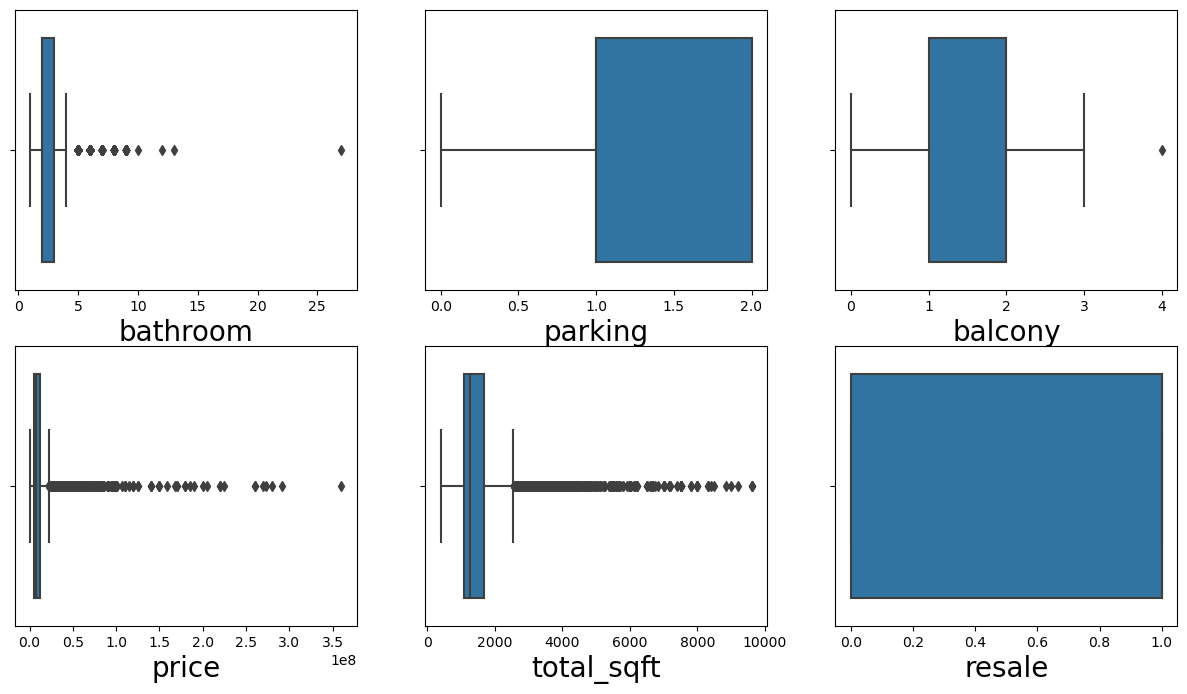

In [39]:
# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot onto
# set_xlabel(): set the x-axis label
# fontsize: sets the font size of the x-axis label
for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)                                     # set the x-axis label

In [40]:
import numpy as np

In [41]:
#removing outliers with IQR 
q1 = np.quantile(df1.price, 0.25) #1st quantile
q2 = np.quantile(df1.price, 0.5) #2nd quantile
q3 = np.quantile(df1.price, 0.75) #3rd quantile
IQR = q3 - q1 #Inter - Quartile Range

In [42]:
#setting the fences on our dataset to identify the outliers
lower = q1 - (1.5*IQR) #lower whisker
upper = q3 + (1.5*IQR) #upper whisker

In [43]:
#removal of lower and upper outliers in our data
df1 = df1[~((df1.price > upper) | (df1.price < lower))]


In [44]:
#removing outliers with IQR 
q1 = np.quantile(df1.total_sqft, 0.25) #1st quantile
q2 = np.quantile(df1.total_sqft, 0.5) #2nd quantile
q3 = np.quantile(df1.total_sqft, 0.75) #3rd quantile
IQR = q3 - q1 #Inter - Quartile Range

In [45]:
#setting the fences on our dataset to identify the outliers
lower = q1 - (1.5*IQR) #lower whisker
upper = q3 + (1.5*IQR) #upper whisker

In [46]:
#removal of lower and upper outliers in our data
df1 = df1[~((df1.total_sqft > upper) | (df1.total_sqft < lower))]


In [47]:
#rechecking the shape
df1.shape

(11358, 12)

In [48]:
#defining the features and label column of our data
X = df1.drop('price',axis = 'columns')
y = df1[['price']]


In [49]:
#dividing data into categorical and numerical
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(exclude = np.number)


In [50]:
#describing numerical features
X_num.describe()

,bathroom,parking,balcony,total_sqft,resale
count,11358.000000,11358.000000,11358.000000,11358.000000,11358.000000
mean,2.390544,1.489347,1.549386,1268.696580,0.500880
std,0.921855,0.506905,0.779859,351.014727,0.500021
min,1.000000,0.000000,0.000000,400.000000,0.000000
25%,2.000000,1.000000,1.000000,1070.000000,0.000000
50%,2.000000,1.000000,2.000000,1214.000000,1.000000
75%,3.000000,2.000000,2.000000,1490.000000,1.000000
max,9.000000,2.000000,3.000000,2254.000000,1.000000


In [51]:
# filter the numeric variables from the data
df_num = df1.select_dtypes(include = np.number)

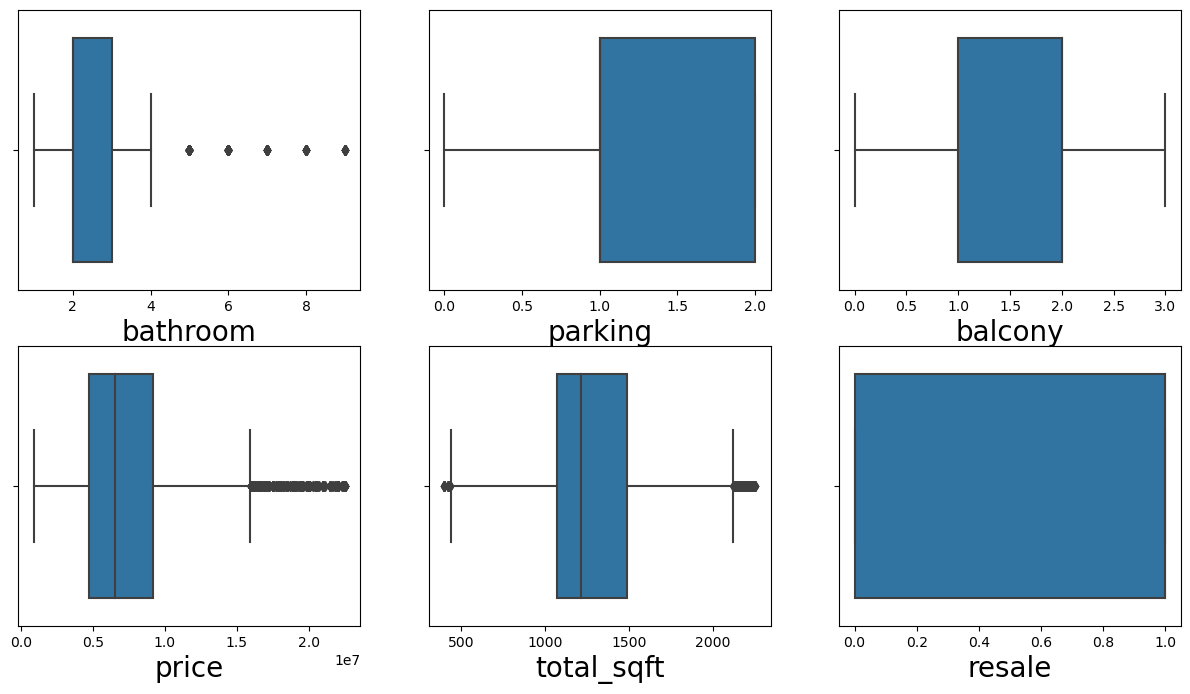

In [52]:
# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot onto
# set_xlabel(): set the x-axis label
# fontsize: sets the font size of the x-axis label
for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)                                     # set the x-axis label

visualize data

In [53]:
import matplotlib.pyplot as plt

univariate analysis: Numerical data - histogram and boxplot

<AxesSubplot:>

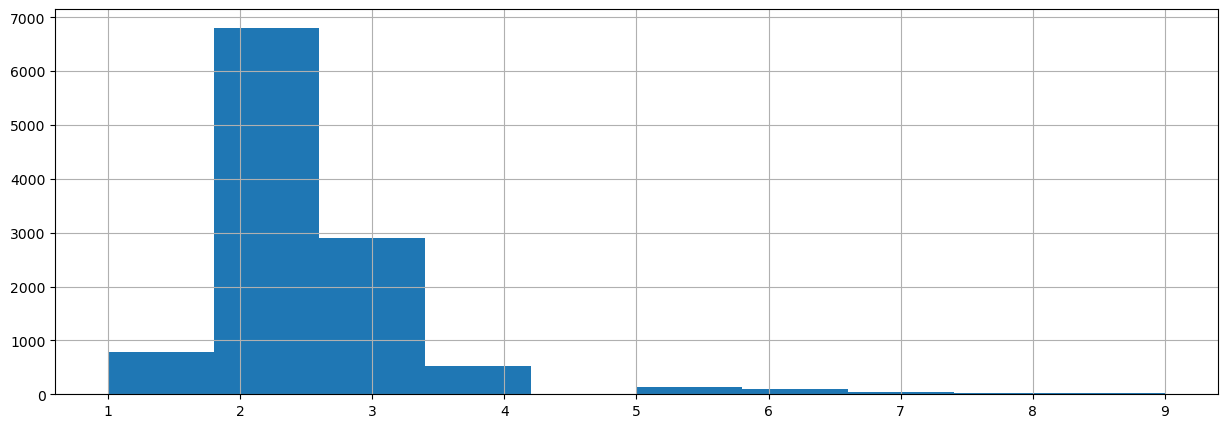

In [54]:
df1['bathroom'].hist()

<AxesSubplot:>

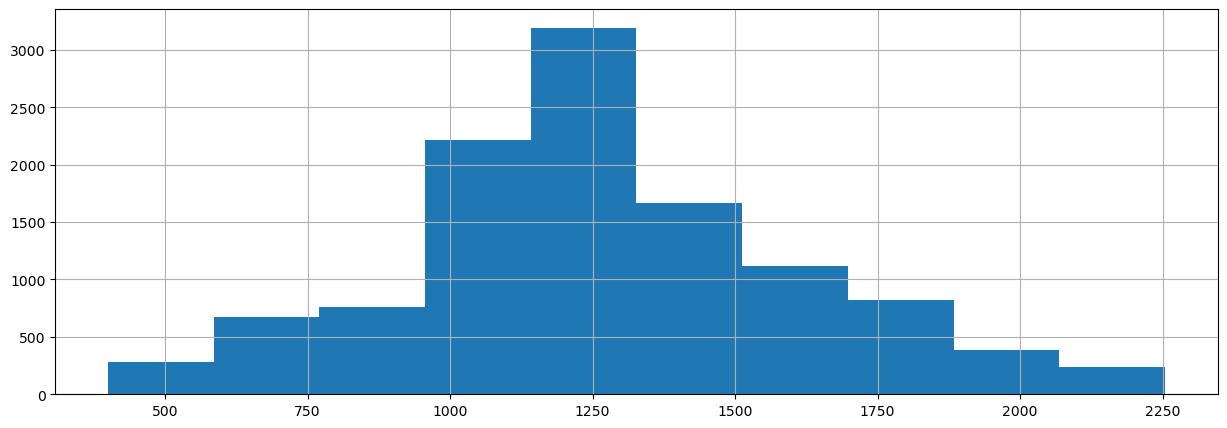

In [55]:
df1['total_sqft'].hist()

<AxesSubplot:>

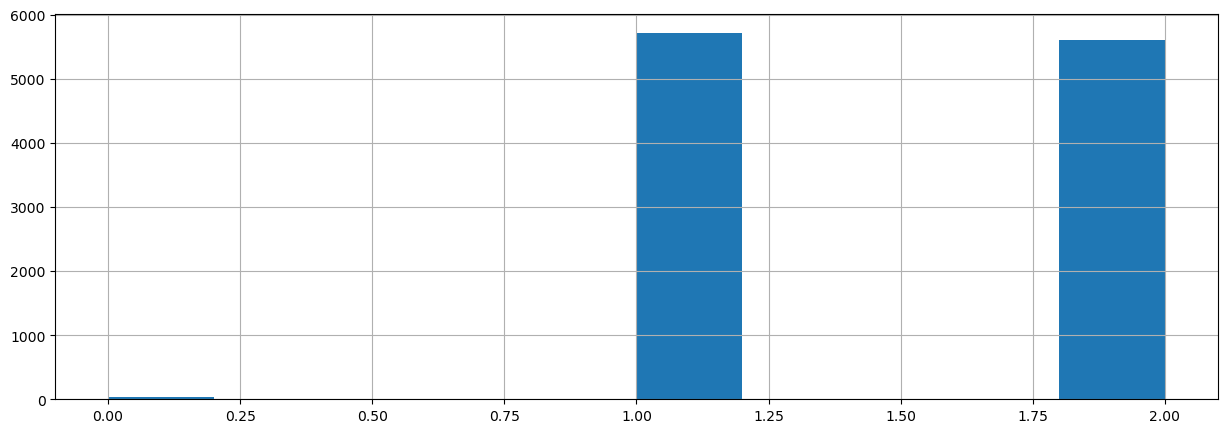

In [56]:
df1['parking'].hist()

<AxesSubplot:>

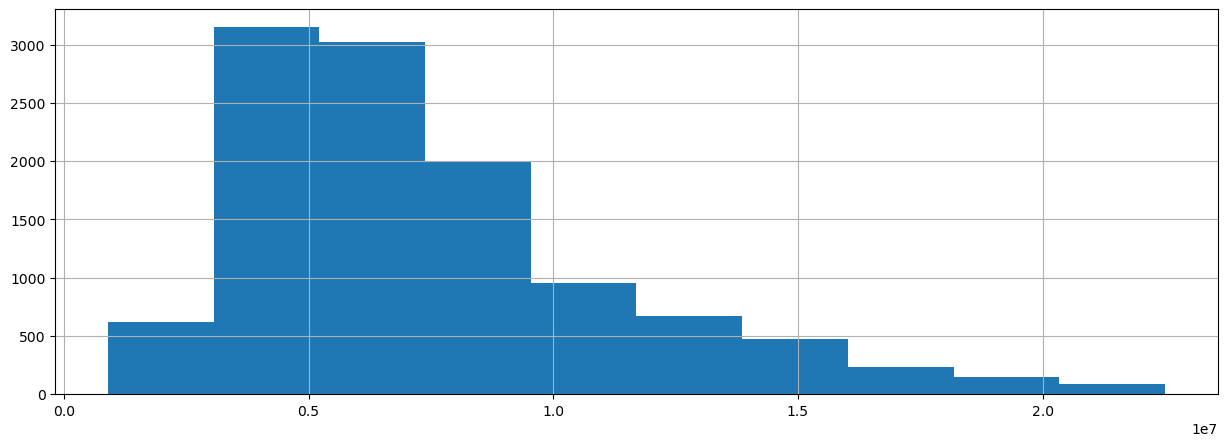

In [57]:
df1['price'].hist()

Checking for normality

That our target variable is normally distributed or not

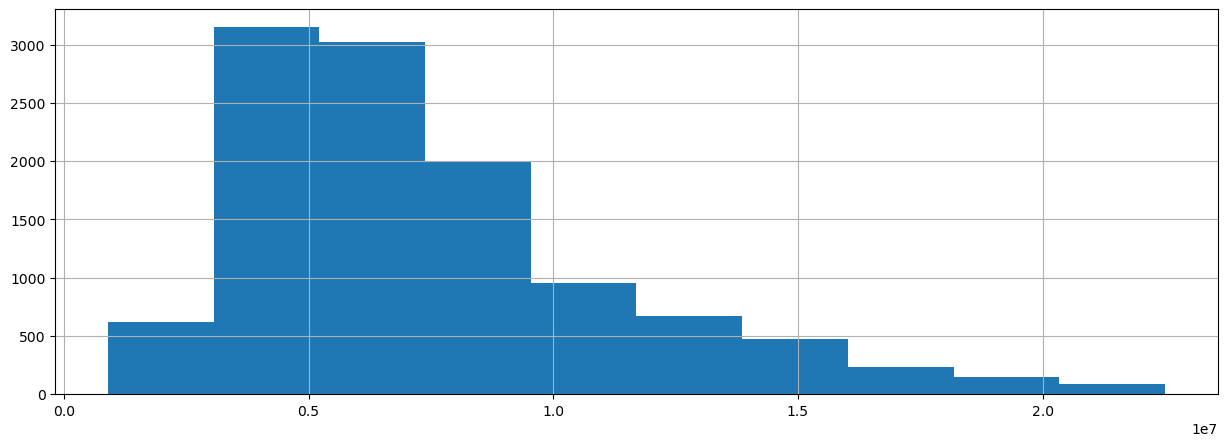

<Figure size 1500x800 with 0 Axes>

In [58]:
df1.price.hist()
plt.figure(figsize=(15,8))
plt.show()

Our data is not normally distributed 

by log transformation we are making a data normally distributed 

Skewness: 1.2740791007413101


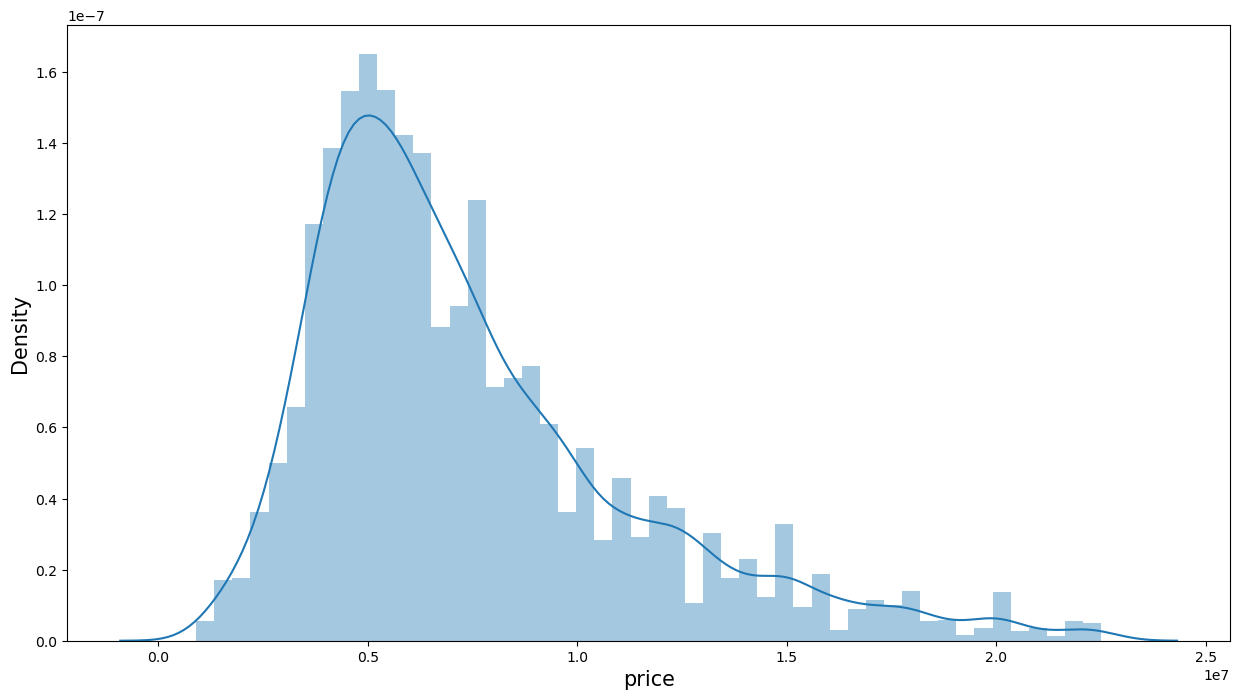

In [59]:
# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# check the distribution of sales of the product
# ax: create an axes object in the figure
ax = sns.distplot(df1['price'])

# set the label for x-axis
ax.set_xlabel('price', fontsize=15)

# coefficient of skewness 
print('Skewness:', df1['price'].skew())

# set label for y-axis
plt.ylabel('Density', fontsize=15)

# display the plot
plt.show()

nterpretation: It can be seen that the variable is positively skewed with the coefficient of skewness as 1.27. Apply the log transformation to reduce the skewness in the data.

Skewness: -0.06176984268630465


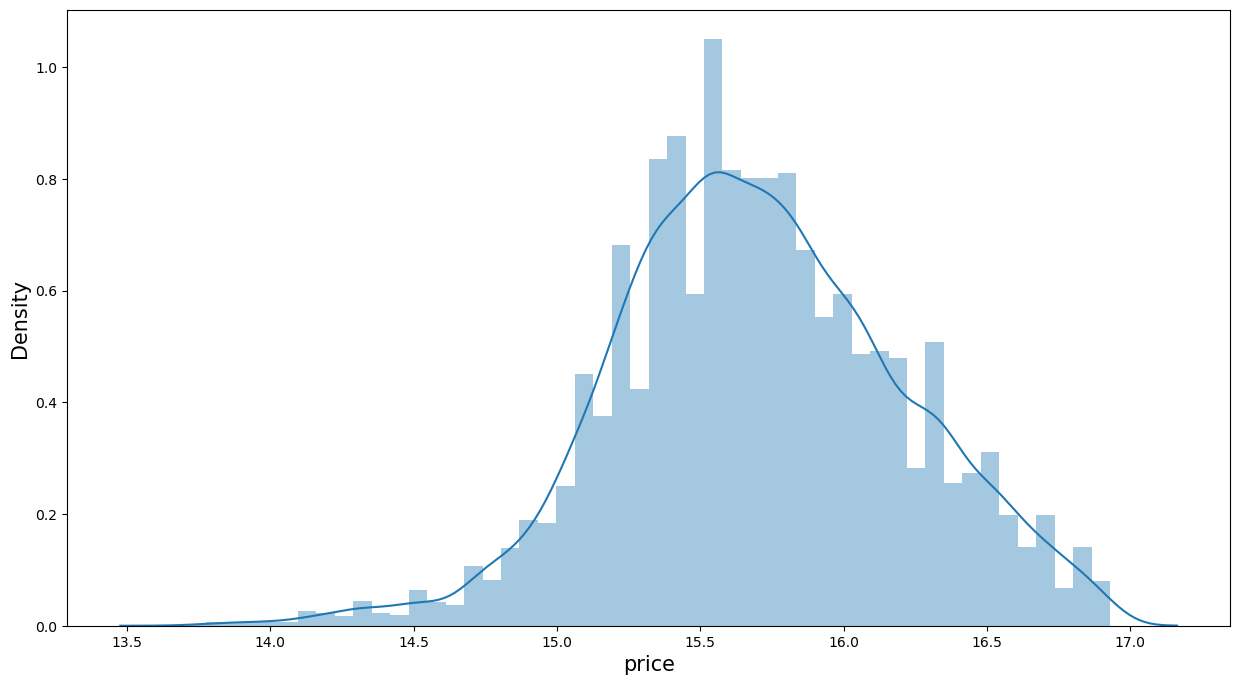

In [60]:
# set the figure size
plt.rcParams["figure.figsize"] = [15,8] 

# apply natural log transformation (with base 'e')
np.log(df1['price'])

# coefficient of skewness of transformed data
print('Skewness:', np.log(df1['price']).skew())

# distribution of log_transformed variable
# ax: create an axes object in the figure
ax = sns.distplot(np.log(df1['price']))

# set the label for x-axis
ax.set_xlabel('price', fontsize=15)

# set label for y-axis
plt.ylabel('Density', fontsize=15)

# display the plot
plt.show()

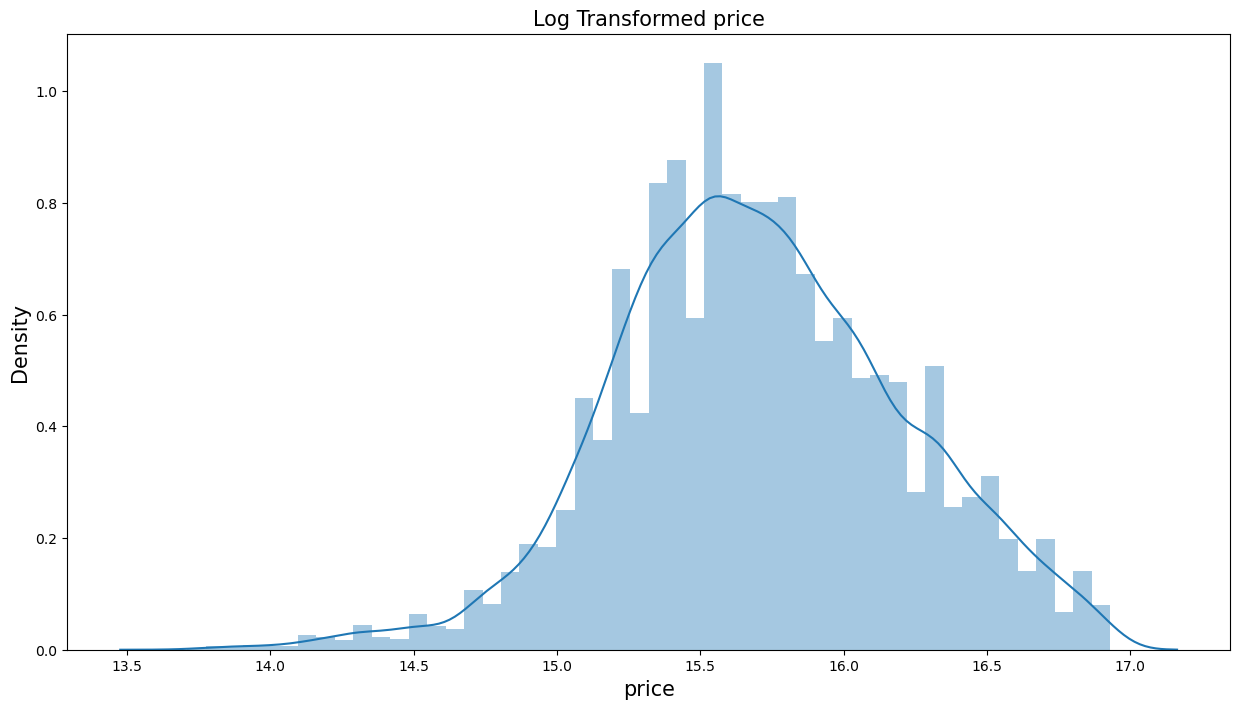

In [61]:
# log_transformed values
log_price =  np.log(df1['price'])

# set the figure size
plt.rcParams["figure.figsize"] = [15,8] 

# plot the distribution
# ax: create an axes object in the figure
ax = sns.distplot(log_price)

# set the title
plt.title("Log Transformed price", fontsize=15)

# set the label for x-axis
ax.set_xlabel('price', fontsize=15)

# set label for y-axis
plt.ylabel('Density', fontsize=15)

# display the plot
plt.show()

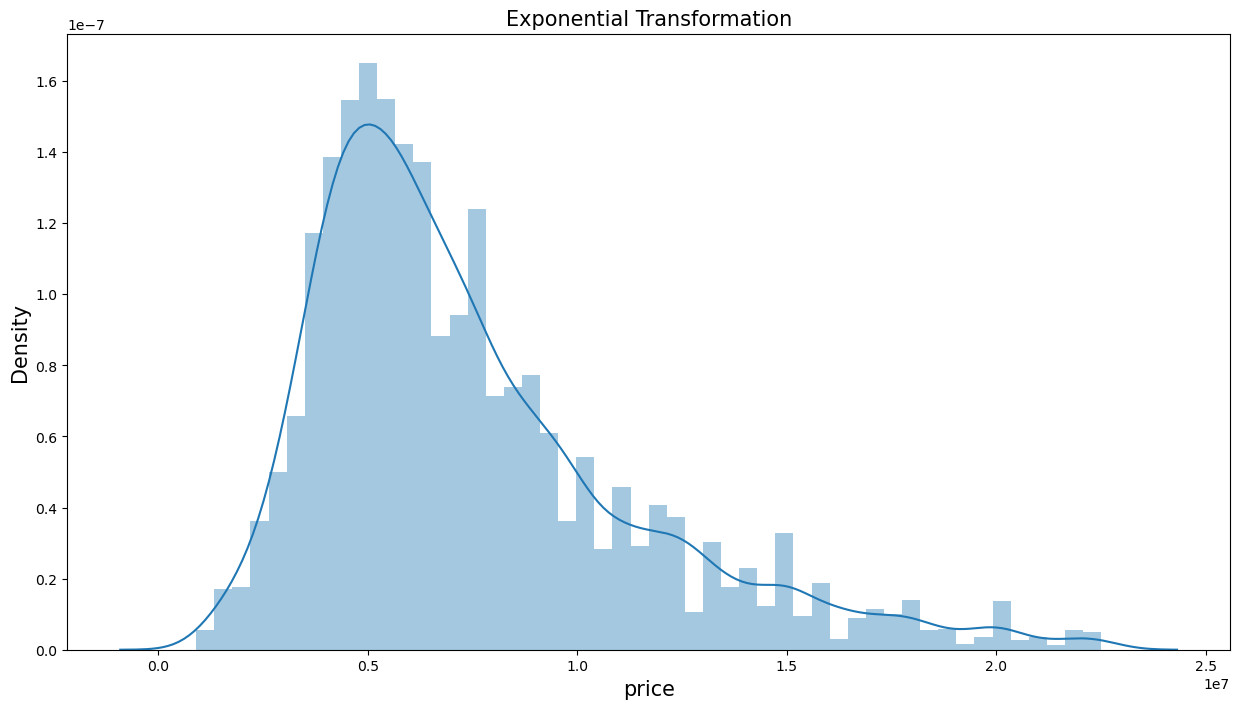

In [62]:
# anti-log of 'log_Item_Outlet_Sales'
Exp_price = np.exp(log_price)

# set the figure size
plt.rcParams["figure.figsize"] = [15,8] 

# plot the distribution
# ax: create an axes object in the figure
ax = sns.distplot(Exp_price)

# set the title
plt.title('Exponential Transformation', fontsize=15)

# set the label for x-axis
ax.set_xlabel('price', fontsize=15)

# set label for y-axis
plt.ylabel('Density', fontsize=15)

# display the plot
plt.show()

In [63]:
log_price.mean()

15.699764366519057

In [64]:
log_price.median()

15.687312734865866

In [65]:
# statistical summary of the data
Exp_price.describe()

count    1.135800e+04
mean     7.463844e+06
std      3.905163e+06
min      9.000000e+05
25%      4.700000e+06
50%      6.500000e+06
75%      9.200000e+06
max      2.250000e+07
Name: price, dtype: float64

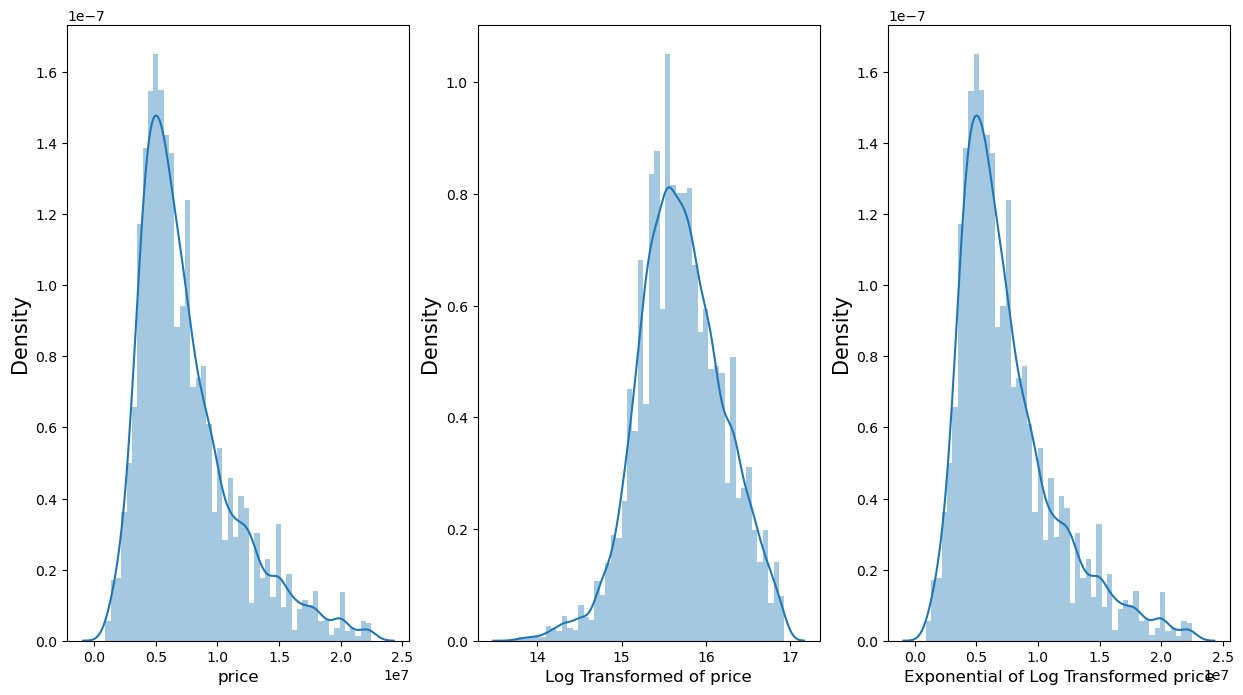

In [66]:
# set the figure size
plt.figure(figsize=(15,8))

# subplot is used to create a set of plots
# we create a subplot of 1 rows by 3 columns 
# use first column for plotting
plt.subplot(1,3,1)

# plot the distribution of original data
sns.distplot(df1['price'])
# set label for x-axis
plt.xlabel('price', fontsize=12)
# set label for y-axis
plt.ylabel('Density', fontsize=15)

# we create a subplot of 1 row by 3 columns 
# use second column for plotting
plt.subplot(1,3,2)

# plot the distribution of log-transformed data
sns.distplot(np.log(df1['price']))

# set label for y-axis
plt.ylabel('Density', fontsize=15)
# set label for x-axis
plt.xlabel('Log Transformed of price', fontsize=12)

# we create a subplot of 1 row by 3 columns 
# use third column for plotting
plt.subplot(1,3,3)

# plot the distribution of the data after taking exponential of log-transformed data
sns.distplot(Exp_price)
# set label for x-axis
plt.xlabel('Exponential of Log Transformed price', fontsize=12)
# set label for y-axis
plt.ylabel('Density', fontsize=15)

# display the plot
plt.show()

In [67]:
#checking correlation between variables
df1.corr()

,bathroom,parking,balcony,price,total_sqft,resale
bathroom,1.000000,0.024413,0.234616,0.558892,0.393299,-0.000238
parking,0.024413,1.000000,0.021442,0.001456,0.043704,0.000384
balcony,0.234616,0.021442,1.000000,0.160632,0.326069,0.009402
price,0.558892,0.001456,0.160632,1.000000,0.575274,-0.013406
total_sqft,0.393299,0.043704,0.326069,0.575274,1.000000,-0.003285
resale,-0.000238,0.000384,0.009402,-0.013406,-0.003285,1.000000


<AxesSubplot:>

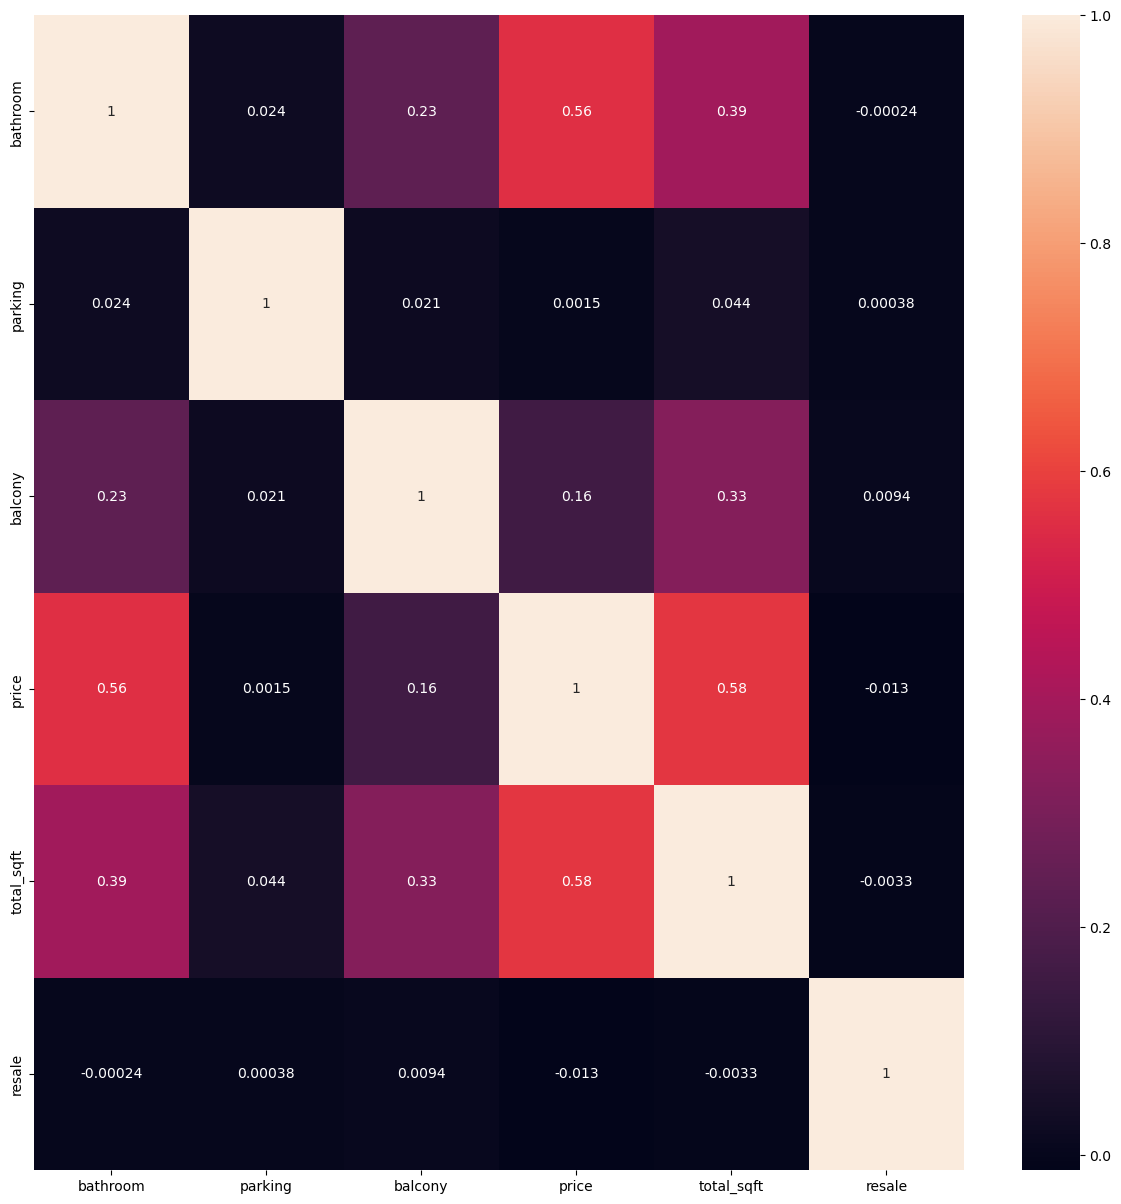

In [68]:
plt.figure(figsize = (15,15))
sns.heatmap(df1.corr(), annot=True)

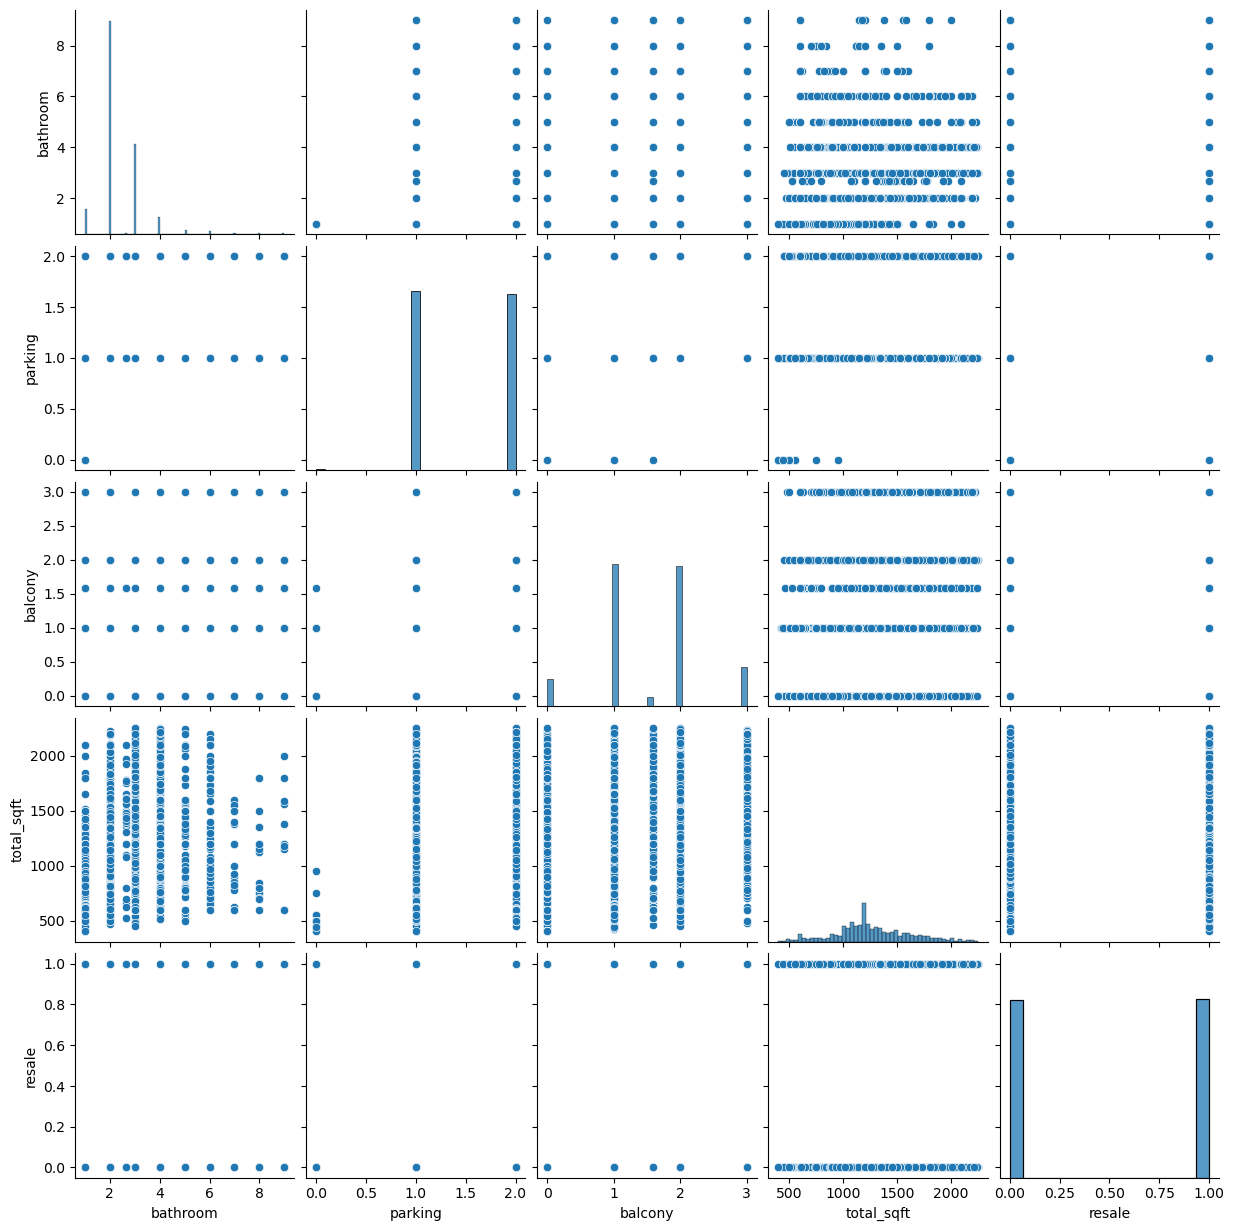

In [69]:
# pairplots to study relationships
sns.pairplot(X_num)

In [78]:
import statsmodels.api as sm

In [79]:
### scaling data

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
sc = MinMaxScaler()

In [82]:
#scaling the data using min max scaler
X_num_scaled = sc.fit_transform(X_num)
X_num_scaled = pd.DataFrame(X_num_scaled)
X_num_scaled.columns = X_num.columns

In [83]:
#checking scaled head
X_num_scaled.head()

,bathroom,parking,balcony,total_sqft,resale
0,0.125,1.0,0.333333,0.353830,0.0
1,0.125,0.5,1.000000,0.560949,1.0
2,0.250,1.0,0.333333,0.604639,0.0
3,0.125,0.5,0.333333,0.431499,1.0
4,0.125,1.0,0.333333,0.415318,0.0


In [84]:
#checking shape of scaled numeric data 
X_num_scaled.shape

(11358, 5)

In [85]:
#One- Hot Encoding the categorical features
X_cat_encoded = pd.get_dummies(X_cat, columns = ['area_type','size','hospital_nearby','school_nearby','mall_nearby','location'])

In [86]:
X_cat_encoded

,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,size_1 BHK,size_1 RK,size_2 BHK,size_3 BHK,size_4 BHK,size_5 BHK,...,location_Marathi Layout,location_Narasapura,location_North Region,location_North-East Region,location_North-West Region,location_South Region,location_South-East Region,location_South-West Region,location_West Region,location_arudi
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13298,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
13299,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13300,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
13303,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [87]:
df.dtypes

area_type           object
size                object
bathroom           float64
parking              int64
balcony            float64
price                int64
total_sqft         float64
hospital_nearby     object
school_nearby       object
mall_nearby         object
resale               int64
location            object
dtype: object

In [88]:
#setting the index of both scaled categorical and numerical data
X_num_scaled.reset_index(inplace = True)
X_cat_encoded.reset_index(inplace = True)
X_num_scaled.head()

,index,bathroom,parking,balcony,total_sqft,resale
0,0,0.125,1.0,0.333333,0.353830,0.0
1,1,0.125,0.5,1.000000,0.560949,1.0
2,2,0.250,1.0,0.333333,0.604639,0.0
3,3,0.125,0.5,0.333333,0.431499,1.0
4,4,0.125,1.0,0.333333,0.415318,0.0


In [89]:
#combining both the scaled data to make the final features data
X = pd.concat([X_num_scaled, X_cat_encoded],axis = 'columns')
X.head()

,index,bathroom,parking,balcony,total_sqft,resale,index,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,...,location_Marathi Layout,location_Narasapura,location_North Region,location_North-East Region,location_North-West Region,location_South Region,location_South-East Region,location_South-West Region,location_West Region,location_arudi
0,0,0.125,1.0,0.333333,0.353830,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0.125,0.5,1.000000,0.560949,1.0,2,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,0.250,1.0,0.333333,0.604639,0.0,3,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3,0.125,0.5,0.333333,0.431499,1.0,4,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4,0.125,1.0,0.333333,0.415318,0.0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
#cheching shape of features
X.shape

(11358, 43)

In [105]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

In [106]:
#spliiting our feature and label data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3,random_state = 2)

In [107]:
#checking shape of train and test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7950, 43), (3408, 43), (7950, 1), (3408, 1))

In [108]:
#X = df1.drop('price',axis = 'columns')
#y = df1[['price']]
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11358 entries, 0 to 11357
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   11358 non-null  int64
dtypes: int64(1)
memory usage: 88.9 KB


In [109]:
X.reset_index(drop=True, inplace=True)

In [110]:
def calculate_vif(df1):
    # Select only the numeric columns
    numeric_df = df.select_dtypes(include=[np.number])

    # Calculate VIF values
    vif = np.zeros(numeric_df.shape[1])
    for i in range(numeric_df.shape[1]):
        # extracting the label in loop
        y = numeric_df.iloc[:, i]
        # extracting the all features which is not label
        x = numeric_df.iloc[:, np.arange(numeric_df.shape[1]) != i]
        # fit the  model
        model = LinearRegression().fit(x, y)
        # claculate the R_2
        r_squared = model.score(x, y)
        # calculating VIF
        vif[i] = 1 / (1 - r_squared)

    # Create a DataFrame to store the VIF values
    vif_df = pd.DataFrame({
        "features": numeric_df.columns,
        "VIF": vif
    })

    return vif_df

In [111]:
calculate_vif(df1)

,features,VIF
0,bathroom,1.534704
1,parking,1.000920
2,balcony,1.061407
3,price,2.002900
4,total_sqft,2.315288
5,resale,1.000091


In [112]:
X

,const,index,bathroom,parking,balcony,total_sqft,resale,index,area_type_Built-up Area,area_type_Carpet Area,...,location_Marathi Layout,location_Narasapura,location_North Region,location_North-East Region,location_North-West Region,location_South Region,location_South-East Region,location_South-West Region,location_West Region,location_arudi
0,1.0,0,0.125,1.0,0.333333,0.353830,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1.0,1,0.125,0.5,1.000000,0.560949,1.0,2,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1.0,2,0.250,1.0,0.333333,0.604639,0.0,3,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1.0,3,0.125,0.5,0.333333,0.431499,1.0,4,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1.0,4,0.125,1.0,0.333333,0.415318,0.0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11353,1.0,11353,0.125,1.0,0.666667,0.464941,0.0,13298,0,0,...,0,0,1,0,0,0,0,0,0,0
11354,1.0,11354,0.125,0.5,0.333333,0.509709,1.0,13299,0,0,...,0,0,0,0,0,0,0,0,0,0
11355,1.0,11355,0.250,0.5,1.000000,0.709277,1.0,13300,0,0,...,0,0,0,0,0,1,0,0,0,0
11356,1.0,11356,0.125,1.0,0.333333,0.399676,1.0,13303,1,0,...,0,0,1,0,0,0,0,0,0,0


In [113]:
# This is the intercept that has to be added to create the model
X = sm.add_constant(X)

# create the model
modelNew = sm.OLS(y,X)

#fit the model
fitted = modelNew.fit() 

#Obtain the results of regression
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     371.1
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        09:43:44   Log-Likelihood:            -1.8408e+05
No. Observations:               11358   AIC:                         3.682e+05
Df Residuals:                   11321   BIC:                         3.685e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                  7.799e+05   1.72e+05      4.534      0.000    4.43e+05    1.12e+06
index                                                  1194.6558   1489.031      0.802      0.422   -1724.104    4113.416
bathroom                                               7.035e+06   4.54e+05     15.486      0.000    6.14e+06    7.92e+06
parking                                               -2.542e+05   9.85e+04     -2.581      0.010   -4.47e+05   -6.12e+04
balcony                                               -1.388e+05   1.06e+05     -1.314      0.189   -3.46e+05    6.82e+04
total_sqft                                             1.198e+07   1.94e+05     61.923      0.000    1.16e+07    1.24e+07
resale                                                 -9.09e+04   4.98e+04     -1.825      0.068   -1.89e+05    6708.245
index                                                 -1023.4325   1270.244     -0.806      0.420   -3513.332    1466.467
area_type_Built-up  Area                              -8.796e+05   9.56e+04     -9.204      0.000   -1.07e+06   -6.92e+05
area_type_Carpet  Area                                 3.049e+05   2.34e+05      1.302      0.193   -1.54e+05    7.64e+05
area_type_Plot  Area                                   2.328e+06   1.05e+05     22.125      0.000    2.12e+06    2.53e+06
area_type_Super built-up  Area                         -9.73e+05   9.03e+04    -10.774      0.000   -1.15e+06   -7.96e+05
size_1 BHK                                             5.426e+05   2.31e+05      2.345      0.019     8.9e+04    9.96e+05
size_1 RK                                              1.113e+06   9.96e+05      1.117      0.264   -8.39e+05    3.06e+06
size_2 BHK                                            -9.305e+05   1.83e+05     -5.073      0.000   -1.29e+06   -5.71e+05
size_3 BHK                                            -1.063e+06   1.71e+05     -6.202      0.000    -1.4e+06   -7.27e+05
size_4 BHK                                             1.607e+05    1.8e+05      0.892      0.372   -1.93e+05    5.14e+05
size_5 BHK                                             3.597e+05   2.38e+05      1.513      0.130   -1.06e+05    8.26e+05
size_6 BHK                                             3.704e+05   2.69e+05      1.377      0.169   -1.57e+05    8.98e+05
size_7 BHK                                             6.186e+05    3.9e+05      1.587      0.112   -1.45e+05    1.38e+06
size_8 BHK                                              4.08e+05   4.21e+05      0.968      0.333   -4.18e+05    1.23e+06
size_9 BHK                                            -7.988e+05   5.62e+05     -1.422      0.155    -1.9e+06    3.02e+05
hospital_nearby_No               

# Linear regression

In [114]:
#multiple linear regression using OLS

In [115]:
#instantiating a linear regression model
lr = LinearRegression()

#fitting a linear regression model for our X and y
model_lr = lr.fit(X_train,y_train) 

In [116]:
#importing Mean Absolute Percentage as a model performance metric
from sklearn.metrics import mean_absolute_percentage_error as mape

In [117]:
 #predicting for our train data using lr model
preds_train_lr = model_lr.predict(X_train)

 #calculating mape for our train data
train_MAPE_lr = mape(y_train, preds_train_lr)

#printing train MAPE
print(train_MAPE_lr)

0.2729459859789521


In [118]:
#predicting for our test data using lr model
preds_test_lr = model_lr.predict(X_test) 

#calculating mape for our test data 
test_MAPE_lr = mape(y_test, preds_test_lr) 

#printing test MAPE
print(test_MAPE_lr)

0.28107836282730736


# R Square

In [119]:
r2_ols=model_lr.score(X_train,y_train)
r2_ols

0.5494127391001253

In [120]:
from sklearn.model_selection import GridSearchCV

In [121]:

from sklearn.metrics import mean_absolute_percentage_error


In [122]:
from sklearn.tree import DecisionTreeRegressor

# fit the Decission Tree Regressor model.

DT_model = DecisionTreeRegressor()
DT_model_fit = DT_model.fit(X_train , y_train)

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [123]:
from sklearn.metrics import r2_score


In [124]:
parameters={"max_depth" : [1,3,5,7,9,10],"min_samples_leaf":[2,3,4,5,6,7,8,9,10]}

tuning_model = GridSearchCV(DT_model,param_grid=parameters,scoring='r2',cv=10)

tuning_model.fit(X_train,y_train)
DT = tuning_model.best_estimator_

R2_dt_train = tuning_model.score(X_train,y_train)
print(R2_dt_train)

DT_pred = DT.predict(X_test)

mse_DT = mean_squared_error (y_test, DT_pred)
rmse_DT = np.sqrt(mean_squared_error (y_test, DT_pred))
r2_DT = r2_score(y_test, DT_pred)

print('MSE for DT model = ', mse_DT)
print('RMSE for DT model = ', rmse_DT)
print('R2 for DT model`= ', r2_DT)

print("Best parameters:", tuning_model.best_params_)

0.6263903254542749
MSE for DT model =  7127858737352.988
RMSE for DT model =  2669804.9998741457
R2 for DT model`=  0.5330526714052874
Best parameters: {'max_depth': 7, 'min_samples_leaf': 9}


In [125]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Assuming you have your training data stored in X_train and y_train
# and test data in X_test and y_test

# Training the decision tree model
tree_model = DecisionTreeRegressor(max_depth= 7, min_samples_leaf= 9)
tree_model.fit(X_train, y_train)

# Predicting on the training and test data
y_train_pred = tree_model.predict(X_train)
y_test_pred = tree_model.predict(X_test)

# Calculating MAPE for training data
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

# Calculating MAPE for test data
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

print("Train MAPE:", train_mape)
print("Test MAPE:", test_mape)


Train MAPE: 0.24776004922071942
Test MAPE: 0.2679649103005095


In [126]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error



# Train the KNN model
k = 3  # Number of neighbors
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict on the training set
y_train_pred = knn.predict(X_train)
y_test_pred =  knn.predict(X_test)

In [127]:
# Calculate MAPE for training set
mape_train_knn = mean_absolute_percentage_error(y_train, y_train_pred)


# Calculate MAPE for testing set
mape_test_knn = mean_absolute_percentage_error(y_test, y_test_pred)
mape_train_knn,mape_test_knn

(0.3966919615301573, 0.5649858189274083)

In [128]:
#creating new dataframe to add mape of all algorithm together
df_snapshot = pd.DataFrame(columns=['model','train_MAPE','test_MAPE'])
df_snapshot

,model,train_MAPE,test_MAPE


In [129]:
#performance metric of linear regression
model_lr_performance = {'model':"model_lr",'train_MAPE':train_MAPE_lr,'test_MAPE':test_MAPE_lr}

In [130]:
#performance metric of knn
model_knn_performance = {'model':"model_knn",'train_MAPE':mape_train_knn,'test_MAPE':mape_test_knn}

In [131]:
#performance metric of DT
model_DT_performance = {'model':"model_DT",'train_MAPE':train_mape,'test_MAPE':test_mape}

In [132]:
#appending performance of lr to dataframe
df_snapshot = df_snapshot.append(model_lr_performance, ignore_index=True)
df_snapshot

,model,train_MAPE,test_MAPE
0,model_lr,0.272946,0.281078


In [133]:
#appending performance of lasso to dataframe
df_snapshot = df_snapshot.append(model_knn_performance, ignore_index=True)
df_snapshot

,model,train_MAPE,test_MAPE
0,model_lr,0.272946,0.281078
1,model_knn,0.396692,0.564986


In [211]:
#appending performance of ridge to dataframe
df_snapshot = df_snapshot.append(model_DT_performance, ignore_index=True)
df_snapshot

C:\Users\satyam\AppData\Local\Temp\ipykernel_17464\2181666297.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_snapshot = df_snapshot.append(model_DT_performance, ignore_index=True)


,model,train_MAPE,test_MAPE
0,model_lr,0.270715,0.284312
1,model_knn,0.392228,0.562657
2,model_DT,0.247665,0.271663


With several characteristics, the suggested methodpredicts the property price in Bangalore. We experimented with different Machine Learning algorithmsto get the best model. When compared to all otheralgorithms, the Decision Tree Algorithm achieved the lowest loss and the greatest R-squared.